In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [40]:
orders = pd.read_csv("Orders.csv")
customers = pd.read_csv("Customers.csv")
restaurants = pd.read_csv("Restaurants.csv")

In [41]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Restaurant_ID           1000 non-null   object 
 2   Order_Date              1000 non-null   object 
 3   Expected_Delivery_Time  1000 non-null   int64  
 4   Actual_Delivery_Time    1000 non-null   int64  
 5   Total_Amount            1000 non-null   float64
 6   Order_Status            1000 non-null   object 
 7   Payment_Method          1000 non-null   object 
 8   Dish_Name               1000 non-null   object 
 9   Customer_ID             1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.3+ KB


In [42]:
orders["Order_Date"] = pd.to_datetime(orders["Order_Date"])
orders["Month"] = orders["Order_Date"].dt.strftime("%B")
orders


,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June
...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March


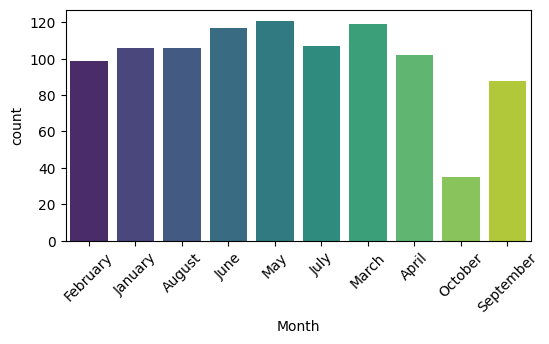

In [43]:
plt.figure(figsize= (6,3))
sns.countplot(x = "Month", data = orders, hue = "Month", palette = 'viridis')
plt.xticks(rotation = 45)
plt.show()

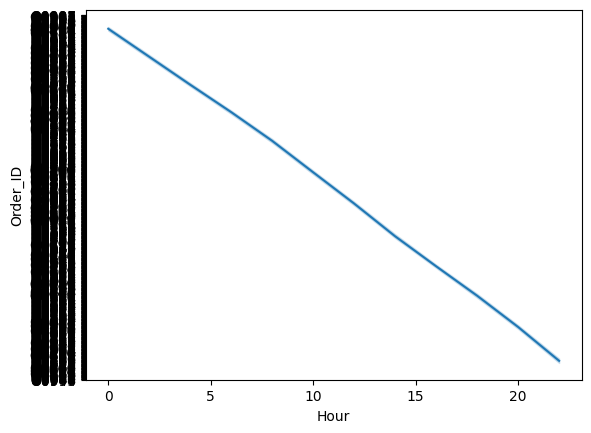

In [44]:
orders["Hour"] = orders["Order_Date"].dt.strftime("%H")
orders["Hour"] = orders["Hour"].astype("int")
orders = orders.sort_values(by = "Hour")
sns.lineplot(x = "Hour", y = "Order_ID", data = orders)
plt.show()

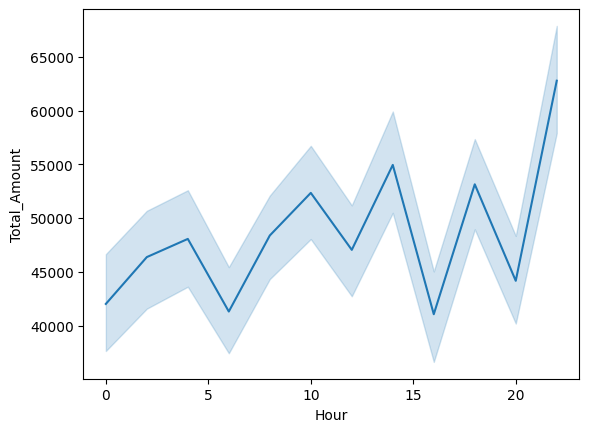

In [46]:
orders["Hour"] = orders["Order_Date"].dt.strftime("%H")
orders["Hour"] = orders["Hour"].astype("int")
orders = orders.sort_values(by = "Hour")
sns.lineplot(x = "Hour", y = "Total_Amount", data = orders,estimator = "sum")
plt.show()

In [47]:
customers

,Customer_ID,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,C001,Delhi,18-25,3.1,Rohan Joshi
1,C002,Bangalore,36-45,4.3,Vivaan Khanna
2,C003,Delhi,26-35,4.6,Mira Rao
3,C004,Mumbai,46-55,4.3,Aarav Sharma
4,C005,Mumbai,36-45,3.2,Dev Patel
...,...,...,...,...,...
195,C196,Pune,36-45,3.6,Rohan Joshi
196,C197,Pune,46-55,4.4,Isha Reddy
197,C198,Delhi,46-55,4.3,Aanya Patel
198,C199,Bangalore,18-25,4.0,Aryan Kumar


In [48]:
df = pd.merge(left = orders, right = customers, on = "Customer_ID", how = "inner" )
df

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October,0,Delhi,36-45,5.0,Saanvi Chopra
1,O0995,R021,2023-08-05 00:00:00,34,32,604.66,Completed,UPI,Egg Fried Rice,C142,August,0,Delhi,36-45,4.7,Kavya Gupta
2,O0961,R100,2023-04-04 00:00:00,26,50,410.91,Completed,Credit Card,Chicken Shawarma,C137,April,0,Bangalore,26-35,4.6,Kabir Kapoor
3,O0987,R048,2023-08-10 00:00:00,26,41,324.76,Completed,Cash,Chicken Shawarma,C081,August,0,Mumbai,26-35,4.1,Aanya Patel
4,O0963,R090,2023-09-10 00:00:00,45,43,744.56,Completed,Cash,Egg Fried Rice,C039,September,0,Pune,36-45,4.7,Dev Patel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February,22,Bangalore,18-25,4.4,Isha Reddy
996,O0947,R053,2023-05-04 22:00:00,32,24,337.53,Completed,Cash,Paneer Butter Masala,C003,May,22,Delhi,26-35,4.6,Mira Rao
997,O0944,R061,2023-10-08 22:00:00,39,33,728.74,Completed,Credit Card,Chole Bhature,C061,October,22,Pune,46-55,3.1,Mira Rao
998,O0993,R100,2023-04-16 22:00:00,26,34,477.04,Completed,Net Banking,Paneer Butter Masala,C055,April,22,Kolkata,18-25,4.8,Aanya Patel


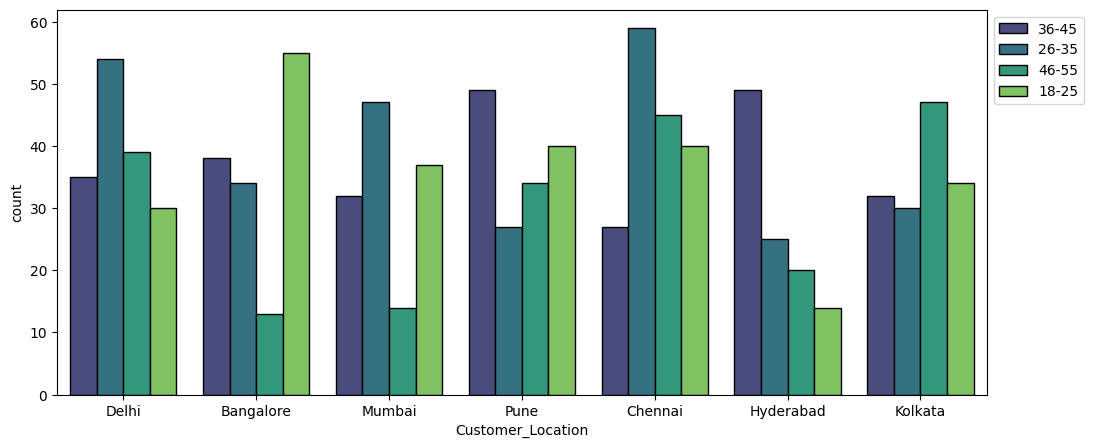

In [49]:
plt.figure(figsize = (12,5)) #width, height
sns.countplot(x = "Customer_Location", data = df, hue = "Customer_Age_Group", palette = "viridis", edgecolor = "black")
plt.legend(bbox_to_anchor = (1,1))
plt.show()